In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium
import math

In [30]:
df = pd.read_csv("data1.csv")
df.head(12)

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine RPM(rpm),Speed (OBD)(km/h),Acceleration Sensor(Total)(g),Litres Per 100 Kilometer(Instant)(l/100km),Speed (GPS)(km/h),Acceleration Sensor(Z axis)(g)
0,Fri Mar 25 17:18:15 GMT+03:00 2016,25-Mar-2016 17:18:08.672,37.583105,55.848558,1.0,14.0,143.0,0.0,-1.069122,8.187592,4.949341,0.002015,-,0.0,0.002015,-,3.5999999046325684,0.405627
1,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.767,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.529938,8.353485,5.078201,0.027657,-,0.0,0.027657,-,3.5999999046325684,0.417656
2,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.867,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.483780,8.233429,4.653717,0.016112,-,0.0,0.016112,-,3.5999999046325684,0.374385
3,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.966,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.489288,8.442078,4.666107,0.015226,-,0.0,0.015226,-,3.5999999046325684,0.375648
4,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.067,37.583102,55.848554,1.0,14.0,143.0,0.0,-0.720825,8.725891,4.743317,0.034077,-,0.0,0.034077,-,3.5999999046325684,0.383519
5,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.166,37.583102,55.848554,1.0,14.0,143.0,0.0,-2.177261,9.481400,3.680664,0.079264,-,0.0,0.079264,-,3.5999999046325684,0.275195
6,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.267,37.583102,55.848554,1.0,14.0,143.0,0.0,-2.482086,9.384720,3.608993,0.083019,-,0.0,0.083019,-,3.5999999046325684,0.267889
7,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.367,37.583102,55.848554,1.0,14.0,143.0,0.0,-2.508072,9.068359,1.875046,0.060501,-,0.0,0.060501,-,3.5999999046325684,0.091136
8,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.466,37.583102,55.848554,1.0,14.0,143.0,0.0,-2.296600,8.867355,0.795517,-0.043751,-,0.0,-0.043751,-,3.5999999046325684,-0.018908
9,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.567,37.583102,55.848554,1.0,14.0,143.0,0.0,-2.675964,8.852341,0.948441,-0.034750,-,0.0,-0.034750,-,3.5999999046325684,-0.003319


# Разминка

## Задание №1
----------
Научиться строить по данным траекторию движения большого бензинового мобильного робота (ББМР). 
Для построения маршрута были выбраны следующие поля:
- Device Time
- Longitude
- Latitude

Также траектория была наложена на карту

In [31]:
# Инициализируем пустой словарь для хранения координат
coordinates = {}

# Извлекаем координаты из фрейма данных
coord_array = np.array(df)[:, 2:4]

# Заполняем словарь координат каждой десятой координатой
# в связи с тем, что новые данные робот получает раз в секунду
for index in range(len(coord_array)):
    if index % 10 == 0:
        coordinates[index] = coord_array[index][::-1]

In [32]:
# Создаем карту с центром в Москве
route_map = folium.Map(location=[55.755864, 37.617698], zoom_start=10)

# Данные для отображения маршрута
coord_list = [coordinates[key] for key in coordinates.keys()]

# Отображаем наш маршрут на карте и выводим ее вместе с маршрутом
folium.PolyLine(coord_list, color='purple', weight=4, opacity=0.8).add_to(route_map)
route_map

## Задание №2
----------
Научиться строить скорость в зависимости от времени эксперимента. В данном 
задании воспользуемся данными с одометра и GPS:
- Speed (OBD)(km/h)
- Speed (GPS)(km/h)

*P.S. GPS-данные получаются 1 раз в секунду и потом просто дублируются*

In [33]:
# Считывание данных с датчиков
gps_velocity = np.array(df)[:,4]
obd_velocity = np.array(df)[:,13]
bearing_angle = np.array(df)[:,7]

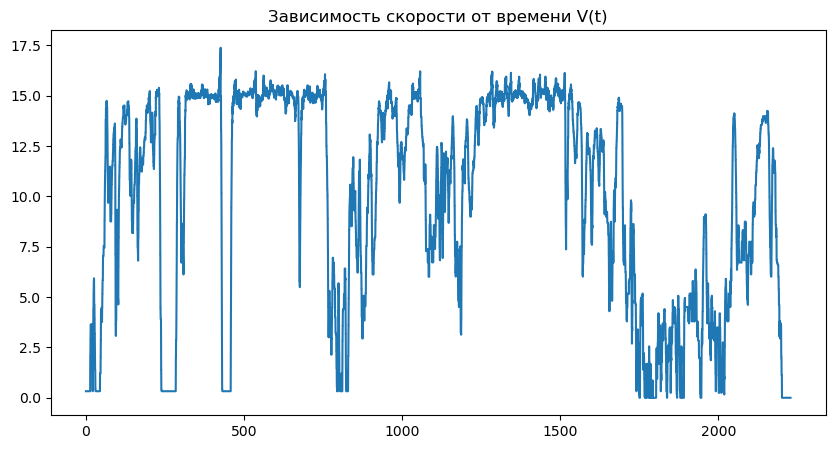

In [34]:
g_std = 1
velocity_list = []

# Вычисление скорости с учетом стандартных отклонений
for idx in range(gps_velocity.shape[0]):
    o_std = (obd_velocity[idx]*0.1 + 1.11) / 3
    total_std = g_std + o_std**2
    velocity_list.append((gps_velocity[idx]*o_std+obd_velocity[idx]*g_std)/total_std)

time_array = np.arange(0, gps_velocity.shape[0]*0.1, 0.1)

# Построение графика скорости
plt.figure(figsize=(10, 5))
plt.title("Зависимость скорости от времени V(t)")
plt.plot(time_array, np.array(velocity_list))

## Задание №3
----------
Разбераться с ориентацией робота (т.е. воспользоваться полем Bearing)
и научиться раскладывать скорость GPS на две компоненты (по X и по Y). 

*P.S. Иногда ориентация робота не определяется 
(в данных поле Bearing = 0; когда, кстати, - как вы думаете?). 
__В этот момент робот движется на север__*

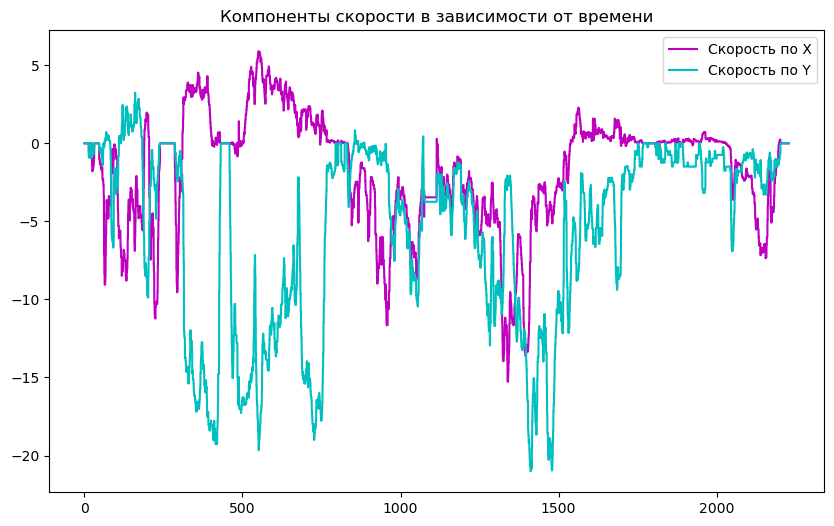

In [35]:
velocity_x = []
velocity_y = []

for idx in range(gps_velocity.shape[0]):
    if bearing_angle[idx] == 0 and gps_velocity[idx] <= 1:
        velocity_x.append(0)
        velocity_y.append(0)
    else:
        velocity_x.append(gps_velocity[idx]*np.sin(np.deg2rad(bearing_angle[idx])))
        velocity_y.append(gps_velocity[idx]*np.cos(np.deg2rad(bearing_angle[idx])))

# Построение графика компонентов скорости
plt.figure(figsize=(10, 6))
plt.plot(time_array, velocity_x, c="m", label="Скорость по X")
plt.plot(time_array, velocity_y, c="c", label="Скорость по Y")
plt.legend()
plt.title("Компоненты скорости в зависимости от времени")

plt.show()